### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_recall_curve,f1_score,auc,average_precision_score,roc_curve,roc_auc_score,average_precision_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib 

matplotlib.style.use('ggplot')

In [2]:
# Creating list of Column names as mentioned in description file.
columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Buzz']

In [3]:
# This DataFrame will be used for Regression
twitterDataReg = pd.read_csv("twitter.data",sep=',',header = None,skipinitialspace=True)
# This DataFrame will be used for Classification
twitterDataClass = pd.read_csv("Twitter-Absolute-Sigma-500.data",header = None,skipinitialspace=True)

In [4]:
twitterDataReg.columns  = columns
twitterDataClass.columns = columns

In [5]:
twitterDataReg.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [6]:
twitterDataClass.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


# Working on Regression Data

In [7]:
twitterDataReg.shape

(583250, 78)

In [8]:
twitterDataReg.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [9]:
twitterDataReg.isna().sum()

NCD_0       0
NCD_1       0
NCD_2       0
NCD_3       0
NCD_4       0
NCD_5       0
NCD_6       0
AI_0        0
AI_1        0
AI_2        0
AI_3        0
AI_4        0
AI_5        0
AI_6        0
AS(NA)_0    0
AS(NA)_1    0
AS(NA)_2    0
AS(NA)_3    0
AS(NA)_4    0
AS(NA)_5    0
AS(NA)_6    0
BL_0        0
BL_1        0
BL_2        0
BL_3        0
BL_4        0
BL_5        0
BL_6        0
NAC_0       0
NAC_1       0
           ..
CS_6        0
AT_0        0
AT_1        0
AT_2        0
AT_3        0
AT_4        0
AT_5        0
AT_6        0
NA_0        0
NA_1        0
NA_2        0
NA_3        0
NA_4        0
NA_5        0
NA_6        0
ADL_0       0
ADL_1       0
ADL_2       0
ADL_3       0
ADL_4       0
ADL_5       0
ADL_6       0
NAD_0       0
NAD_1       0
NAD_2       0
NAD_3       0
NAD_4       0
NAD_5       0
NAD_6       0
Buzz        0
Length: 78, dtype: int64

##### Defining X as features and y as target variable

In [10]:
X = pd.DataFrame(twitterDataReg.loc[:,twitterDataReg.columns!='Buzz'])
y = pd.DataFrame(twitterDataReg['Buzz'])

# Splitting Data 75/25 for final training and testing for Regression

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_FR,X_test_FR,y_train_FR,y_test_FR = train_test_split(X,y,random_state = 0)
stdscaler = StandardScaler()
X_train_FR = stdscaler.fit_transform(X_train_FR)
X_test_FR = stdscaler.transform(X_test_FR)

In [12]:
X_train_FR = pd.DataFrame(X_train_FR,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

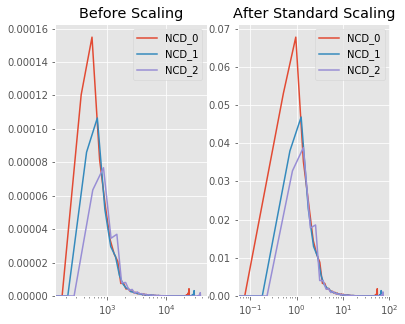

In [13]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
#sns.distplot(twitterDataReg['NCD_0'], hist=False, rug=True)
sns.kdeplot(twitterDataReg['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After Standard Scaling")
#sns.distplot(X_train['NCD_0'], hist=False, rug=True)
sns.kdeplot(X_train_FR['NCD_0'],ax=ax2)
sns.kdeplot(X_train_FR['NCD_1'],ax=ax2)
sns.kdeplot(X_train_FR['NCD_2'],ax=ax2)
ax2.set_xscale('log')

Standard Scaling removes the mean and scales the data to unit variance as we can see in the plot. However, as outliers of each feature have different magnitudes
these variables are not scaled at the same scale. Standard Scalar is not gurranting balanced feature scaling.

##### Scaling using MinMax Scaler

In [14]:
X_train_FR1,X_test_FR1,y_train_FR1,y_test_FR1 = train_test_split(X,y,random_state = 0)
mmscaler = MinMaxScaler()
X_train_FR1 = mmscaler.fit_transform(X_train_FR1)
X_test_FR1 = mmscaler.transform(X_test_FR1)

In [15]:
X_train_FR1 = pd.DataFrame(X_train_FR1,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

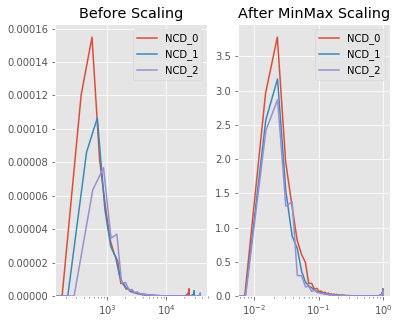

In [16]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(twitterDataReg['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After MinMax Scaling")
sns.kdeplot(X_train_FR1['NCD_0'],ax=ax2)
sns.kdeplot(X_train_FR1['NCD_1'],ax=ax2)
sns.kdeplot(X_train_FR1['NCD_2'],ax=ax2)
ax2.set_xscale('log')
plt.show()

In MinMax Scaling the data is scaled to same scale(Normalize betweeen 0,1) as seen in the plot. However they are not centered to mean = 0.(Standardized!!)
Also MinMax Scaling is more sensetive to outliers and thus affecting inliers as well. As seen, the plot seems skewed to the right.

We will be selecting Standard scaling for Regression problem as it is often recommended to use Standardized data.
Secondly, we will be using Polynomial regression and so if the data is not centered then the degree term of X will be highly corelated to the normal term. Centering the data removes this issue. 

In [17]:
#Standard Scaling
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = .9995)


stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

## Linear regression

In [18]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression(n_jobs = -1)
linearModel.fit(X_train,y_train.values.ravel())

lr_score = cross_val_score(linearModel,X_train,y_train,cv=11)
print("Cross Validation Scores are: {}".format(lr_score))

Cross Validation Scores are: [ 0.69065973  0.94740851  0.70207112  0.76246588  0.93830149  0.80108434
  0.72490097 -0.3071992   0.85253687  0.43695819  0.74195453]


In [19]:
LinearReg_train_prediction = linearModel.predict(X_train)
LinearReg_test_prediction = linearModel.predict(X_test)

In [20]:
print('Train r2_score: %.2f'%r2_score(LinearReg_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(LinearReg_test_prediction, y_test))

Train r2_score: 0.99
Test r2_score: 0.79 


In [21]:
report_table = [['Linear Regression','NA', mean_absolute_error(LinearReg_train_prediction, y_train),  mean_absolute_error(LinearReg_test_prediction, y_test), r2_score(LinearReg_train_prediction, y_train), r2_score(LinearReg_test_prediction, y_test) ]]

# Polynomial Regression

In [22]:
from  sklearn.preprocessing import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    linearModel.fit(X_train_poly, y_train)
    train_score_list.append(linearModel.score(X_train_poly, y_train))
    test_score_list.append(linearModel.score(X_test_poly, y_test))

In [23]:
print(train_score_list)

[0.9784815733396125, 1.0]


In [24]:
print(test_score_list)

[0.7462444600135085, -236253.80638718492]


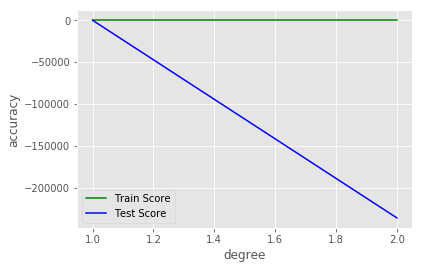

In [25]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

As expected polynomial regression is not yeilding any positive increase in the linear regression and so won't be using it

## SGD Regressor

In [26]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state = 0)

#### GridSearchCV for parameters for SGDRegressor

sgd_param = {
    'max_iter':[1000,10000,100000],
    'penalty': ['l1','l2'],
    'alpha':[0.1,1,10,100]
}

gridsgd = GridSearchCV(estimator = sgd,param_grid = sgd_param,n_jobs=-1,cv=10,scoring='r2')
gridsgd.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_iter': [1000, 10000, 100000], 'penalty': ['l1', 'l2'], 'alpha': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [27]:
gridsgd.best_params_

{'alpha': 0.1, 'max_iter': 10000, 'penalty': 'l2'}

In [28]:
gridsgd.score(X_train,y_train.values.ravel())
gridsgd.score(X_test,y_test.values.ravel())

0.8833952754839274

In [29]:
grid_sgd_train_prediction = gridsgd.predict(X_train)
grid_sgd_test_prediction = gridsgd.predict(X_test)

In [30]:
print('Train r2_score: %.2f'%r2_score(grid_sgd_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(grid_sgd_test_prediction, y_test))

Train r2_score: 0.98
Test r2_score: 0.84 


In [31]:
report_table = [['SGDRegressor', gridsgd.best_params_, mean_absolute_error(grid_sgd_train_prediction, y_train),mean_absolute_error(grid_sgd_test_prediction, y_test), r2_score(grid_sgd_train_prediction, y_train), r2_score(grid_sgd_test_prediction, y_test) ]]

# KNN Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn_param = {'n_neighbors':[1, 5, 10, 15, 20]}
knn_reg = KNeighborsRegressor()
knngrid = GridSearchCV(estimator = knn_reg,param_grid=knn_param,n_jobs=-1,cv=11,scoring='r2')
knngrid.fit(X_train,y_train)

GridSearchCV(cv=11, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [33]:
print(knngrid.score(X_train,y_train.values.ravel()))
print(knngrid.score(X_test,y_test))

0.8731162004715234
0.514211104918507


In [34]:
knngrid.best_params_

{'n_neighbors': 5}

In [35]:
knn_grid_train_prediction = knngrid.predict(X_train)
knn_grid_test_prediction = knngrid.predict(X_test)

In [36]:
print('Train r2_score: %.2f'%r2_score(knn_grid_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(knn_grid_test_prediction, y_test))

Train r2_score: 0.78
Test r2_score: -1.08 


In [37]:
report_table = report_table + [['KnnRegressor', knngrid.best_params_, mean_absolute_error(knn_grid_train_prediction, y_train),mean_absolute_error(knn_grid_test_prediction, y_test), r2_score(knn_grid_train_prediction, y_train), r2_score(knn_grid_test_prediction, y_test) ]]

# Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
ridge_param = {'alpha':[0.01, 0.1, 1, 10, 100,1000]}
ridge_reg = Ridge()
gridridge = GridSearchCV(estimator = ridge_reg,param_grid = ridge_param,n_jobs=-1,cv=10,scoring='r2')
gridridge.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [39]:
gridridge.best_params_

{'alpha': 100}

In [40]:
ridge_grid_train_prediction = gridridge.predict(X_train)
ridge_grid_test_prediction = gridridge.predict(X_test)

In [41]:
print('Train r2_score: %.2f'%r2_score(ridge_grid_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(ridge_grid_test_prediction, y_test))

Train r2_score: 0.97
Test r2_score: 0.82 


In [42]:
report_table =report_table + [['Ridge_Regressor', gridridge.best_params_, mean_absolute_error(ridge_grid_train_prediction, y_train),mean_absolute_error(ridge_grid_test_prediction, y_test), r2_score(ridge_grid_train_prediction, y_train), r2_score(ridge_grid_test_prediction, y_test) ]]

# Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
lasso_param = {'alpha':[0.01, 0.1, 1, 10, 100,1000]}
lasso_reg = Lasso()
gridlasso = GridSearchCV(estimator = lasso_reg,param_grid = lasso_param,n_jobs=-1,cv=10,scoring='r2')
gridlasso.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [44]:
gridlasso.best_params_

{'alpha': 1}

In [45]:
lasso_grid_train_prediction = gridlasso.predict(X_train)
lasso_grid_test_prediction = gridlasso.predict(X_test)

In [46]:
print('Train r2_score: %.2f'%r2_score(lasso_grid_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(lasso_grid_test_prediction, y_test))

Train r2_score: 0.98
Test r2_score: 0.84 


In [47]:
report_table =report_table + [['Lasso_Regressor', gridlasso.best_params_, mean_absolute_error(lasso_grid_train_prediction, y_train),mean_absolute_error(lasso_grid_test_prediction, y_test), r2_score(lasso_grid_train_prediction, y_train), r2_score(lasso_grid_test_prediction, y_test) ]]

# LinearSVR

In [48]:
from sklearn.svm import SVR,LinearSVR
lsvr_param = {'C':[0.01, 0.1, 1, 10, 100,1000]}
linearsvr_reg = SVR(kernel = 'linear')
gridlinearsvr = GridSearchCV(estimator = linearsvr_reg,param_grid = lsvr_param,n_jobs=-1,cv=10,scoring='r2')
gridlinearsvr.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [49]:
gridlinearsvr.best_params_

{'C': 10}

In [50]:
linearsvr_grid_train_prediction = gridlinearsvr.predict(X_train)
linearsvr_grid_test_prediction = gridlinearsvr.predict(X_test)

In [51]:
print('Train r2_score: %.2f'%r2_score(linearsvr_grid_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(linearsvr_grid_test_prediction, y_test))

Train r2_score: 0.98
Test r2_score: 0.83 


In [52]:
report_table =report_table + [['LinearSVR_Regressor', gridlinearsvr.best_params_, mean_absolute_error(linearsvr_grid_train_prediction, y_train),mean_absolute_error(linearsvr_grid_test_prediction, y_test), r2_score(linearsvr_grid_train_prediction, y_train), r2_score(linearsvr_grid_test_prediction, y_test) ]]

# Gaussian_SVR

In [53]:
from sklearn.svm import SVR,LinearSVR
svr_param = {'C':[0.01, 0.1, 1, 10, 100,1000],'gamma':[0.01,0.1,1,10,100]}
svr_reg = SVR(kernel = 'rbf')
gridsvr = GridSearchCV(estimator = svr_reg,param_grid = svr_param,n_jobs=-1,cv=10,scoring='r2')
gridsvr.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [54]:
gridsvr.best_params_

{'C': 1000, 'gamma': 0.01}

In [55]:
svr_grid_train_prediction = gridsvr.predict(X_train)
svr_grid_test_prediction = gridsvr.predict(X_test)

In [56]:
print('Train r2_score: %.2f'%r2_score(svr_grid_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(svr_grid_test_prediction, y_test))

Train r2_score: 0.62
Test r2_score: -4.76 


In [57]:
report_table =report_table + [['SVR_Regressor', gridsvr.best_params_, mean_absolute_error(svr_grid_train_prediction, y_train),mean_absolute_error(svr_grid_test_prediction, y_test), r2_score(svr_grid_train_prediction, y_train), r2_score(svr_grid_test_prediction, y_test) ]]

# RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr_param = {'bootstrap':[True],'n_estimators' : [500,1000,2000],'min_samples_leaf': [10,20,50,80]}
rfr = RandomForestRegressor(random_state = 0)
rfrgrid = GridSearchCV(estimator=rfr,param_grid=rfr_param,n_jobs=-1,cv = 10,scoring='r2')
rfrgrid.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'n_estimators': [500, 1000, 2000], 'min_samples_leaf': [10, 20, 50, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [59]:
rfrgrid.best_params_

{'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 2000}

In [60]:
rfr_grid_train_prediction = rfrgrid.predict(X_train)
rfr_grid_test_prediction = rfrgrid.predict(X_test)

In [61]:
print('Train r2_score: %.2f'%r2_score(rfr_grid_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(rfr_grid_test_prediction, y_test))

Train r2_score: 0.55
Test r2_score: -1.24 


In [62]:
report_table=report_table + [['RandomForest', rfrgrid.best_params_, mean_absolute_error(rfr_grid_train_prediction, y_train),mean_absolute_error(rfr_grid_test_prediction, y_test), r2_score(rfr_grid_train_prediction, y_train), r2_score(rfr_grid_test_prediction, y_test) ]]

In [63]:
report_table = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Mean_absolute_Error(Train)', 'Mean_absolute_Error(Test)', 'Train R^2 score', 'Test R^2 score'])

In [64]:
report_table

,Model name,Model parameter,Mean_absolute_Error(Train),Mean_absolute_Error(Test),Train R^2 score,Test R^2 score
0,SGDRegressor,"{'alpha': 0.1, 'max_iter': 10000, 'penalty': '...",24.450220,52.548453,0.980406,0.842721
1,KnnRegressor,{'n_neighbors': 5},36.412027,74.167653,0.779749,-1.082562
2,Ridge_Regressor,{'alpha': 100},27.548246,52.936209,0.973022,0.819503
3,Lasso_Regressor,{'alpha': 1},24.256527,52.405366,0.981558,0.843351
4,LinearSVR_Regressor,{'C': 10},21.464068,52.987895,0.980753,0.832866
5,SVR_Regressor,"{'C': 1000, 'gamma': 0.01}",25.272350,98.075151,0.615921,-4.760704
6,RandomForest,"{'bootstrap': True, 'min_samples_leaf': 10, 'n...",44.931513,82.958101,0.548026,-1.244657


Lassor regression has lowest mean_absolute_error and better R2 score when compairing to other models.

## Lasso Regression on Final Test Data

In [65]:
lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(X_train_FR,y_train_FR.values.ravel())

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
X_train_FR.shape

(437437, 77)

In [67]:
X_test_FR.shape

(145813, 77)

In [68]:
print(lasso_reg.score(X_train_FR,y_train_FR.values.ravel()))
print(lasso_reg.score(X_test_FR,y_test_FR))

0.930819248421121
0.9427434696737714


In [69]:
lasso_reg_train_prediction = lasso_reg.predict(X_train_FR)
lasso_reg_test_prediction = lasso_reg.predict(X_test_FR)

In [70]:
print('Train r2_score: %.2f'%r2_score(lasso_reg_train_prediction, y_train_FR))
print('Test r2_score: %.2f '%r2_score(lasso_reg_test_prediction, y_test_FR))

Train r2_score: 0.93
Test r2_score: 0.94 


In [71]:
print('Train mean_absolute_error: %.2f'%mean_absolute_error(lasso_reg_train_prediction, y_train_FR))
print('Test mean_absolute_error: %.2f '%mean_absolute_error(lasso_reg_test_prediction, y_test_FR))

Train mean_absolute_error: 45.56
Test mean_absolute_error: 45.43 


In [72]:
print('Train mean_squared_error: %.2f'%mean_squared_error(lasso_reg_train_prediction, y_train_FR))
print('Test mean_squared_error: %.2f '%mean_squared_error(lasso_reg_test_prediction, y_test_FR))

Train mean_squared_error: 26387.74
Test mean_squared_error: 20360.58 


In regression dataset we have lasso regression which is giving the least mean_aboslute_error and highest R2.
Also, an interesting finding is that as we are using alpha = 1, that is all the features are being used.

Results:
Train r2_score: 0.93
Test r2_score: 0.94
Train mean_absolute_error: 45.56
Test mean_absolute_error: 45.43
Train mean_squared_error: 26387.74
Test mean_squared_error: 20360.58

# Classification

## EDA and Pre-processing for Classification 

In [73]:
twitterDataClass.shape

(140707, 78)

In [74]:
twitterDataClass.isna().sum()

NCD_0       0
NCD_1       0
NCD_2       0
NCD_3       0
NCD_4       0
NCD_5       0
NCD_6       0
AI_0        0
AI_1        0
AI_2        0
AI_3        0
AI_4        0
AI_5        0
AI_6        0
AS(NA)_0    0
AS(NA)_1    0
AS(NA)_2    0
AS(NA)_3    0
AS(NA)_4    0
AS(NA)_5    0
AS(NA)_6    0
BL_0        0
BL_1        0
BL_2        0
BL_3        0
BL_4        0
BL_5        0
BL_6        0
NAC_0       0
NAC_1       0
           ..
CS_6        0
AT_0        0
AT_1        0
AT_2        0
AT_3        0
AT_4        0
AT_5        0
AT_6        0
NA_0        0
NA_1        0
NA_2        0
NA_3        0
NA_4        0
NA_5        0
NA_6        0
ADL_0       0
ADL_1       0
ADL_2       0
ADL_3       0
ADL_4       0
ADL_5       0
ADL_6       0
NAD_0       0
NAD_1       0
NAD_2       0
NAD_3       0
NAD_4       0
NAD_5       0
NAD_6       0
Buzz        0
Length: 78, dtype: int64

In [75]:
twitterDataClass['Buzz'].value_counts()

0.0    112932
1.0     27775
Name: Buzz, dtype: int64

Defining X, y values

In [76]:
X_c = pd.DataFrame(twitterDataClass.loc[:,twitterDataClass.columns!='Buzz'])
y_c = pd.DataFrame(twitterDataClass['Buzz'])

## Splitting data in 75/25 for final evalations of Classification models

### Standard Scaling Vs MinMax Scaling

In [77]:
X_train_F,X_test_F,y_train_F,y_test_F = train_test_split(X_c,y_c,random_state = 0)
mmscaler = MinMaxScaler()
X_train_F = mmscaler.fit_transform(X_train_F)
X_test_F = mmscaler.transform(X_test_F)

In [78]:
X_train_F = pd.DataFrame(X_train_F,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

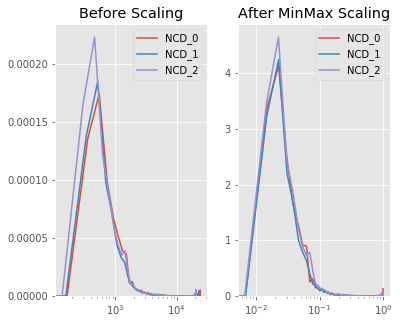

In [79]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
#sns.distplot(twitterDataReg['NCD_0'], hist=False, rug=True)
sns.kdeplot(twitterDataClass['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataClass['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataClass['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After MinMax Scaling")
#sns.distplot(X_train['NCD_0'], hist=False, rug=True)
sns.kdeplot(X_train_F['NCD_0'],ax=ax2)
sns.kdeplot(X_train_F['NCD_1'],ax=ax2)
sns.kdeplot(X_train_F['NCD_2'],ax=ax2)
ax2.set_xscale('log')

In [80]:
X_train_F1,X_test_F1,y_train_F1,y_test_F1 = train_test_split(X_c,y_c,random_state = 0)
stdscaler = StandardScaler()
X_train_F1 = mmscaler.fit_transform(X_train_F1)
X_test_F1 = mmscaler.transform(X_test_F1)

In [81]:
X_train_F1 = pd.DataFrame(X_train_F1,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

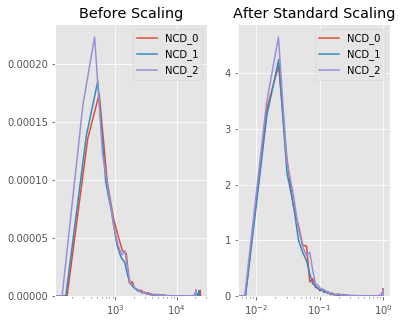

In [82]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
#sns.distplot(twitterDataReg['NCD_0'], hist=False, rug=True)
sns.kdeplot(twitterDataClass['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataClass['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataClass['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After Standard Scaling")
#sns.distplot(X_train['NCD_0'], hist=False, rug=True)
sns.kdeplot(X_train_F1['NCD_0'],ax=ax2)
sns.kdeplot(X_train_F1['NCD_1'],ax=ax2)
sns.kdeplot(X_train_F1['NCD_2'],ax=ax2)
ax2.set_xscale('log')

In Classification problems it is important to have data normalized that is having the same scale, rather than standardized
without having equal scale 
So, we will be using MinMax scaling rather than Standard Scaling.

In [83]:
# MinMax Scaling
X_train_C,X_test_C,y_train_C,y_test_C = train_test_split(X_c,y_c,random_state = 0,test_size=.90)
stdscaler = MinMaxScaler()
X_train_C = stdscaler.fit_transform(X_train_C)
X_test_C = stdscaler.transform(X_test_C)

# Logistic regression using f1 score as scoring parameter

In [84]:
from sklearn.linear_model import LogisticRegression
logit_param = {'penalty':['l1','l2'],'C':[0.01, 0.1, 1, 10, 100, 1000]}

logit = LogisticRegression(random_state = 0)
gridlogit1 = GridSearchCV(estimator = logit,param_grid = logit_param,n_jobs=-1,cv=10,scoring='f1')
gridlogit1.fit(X_train_C,y_train_C.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [85]:
gridlogit1.best_params_

{'C': 100, 'penalty': 'l1'}

In [86]:
gridlogit1.score(X_test_C,y_test_C)

0.9109708003841518

In [87]:
gridlogit1_train_prediction = gridlogit1.predict(X_train_C)
gridlogit1_test_prediction = gridlogit1.predict(X_test_C)

In [88]:
print('Train f1_score: %.2f'%f1_score(gridlogit1_train_prediction, y_train_C))
print('Test f1_score: %.2f '%f1_score(gridlogit1_test_prediction, y_test_C))

Train f1_score: 0.92
Test f1_score: 0.91 


In [89]:
print("CLassification_metrics :")
print(classification_report(y_test_C,gridlogit1_test_prediction))

CLassification_metrics :
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98    101624
        1.0       0.93      0.89      0.91     25013

avg / total       0.97      0.97      0.97    126637



# Logistic regression using roc_auc as scoring parameter

In [90]:
gridlogit = GridSearchCV(estimator = logit,param_grid = logit_param,n_jobs=-1,cv=10,scoring='roc_auc')
gridlogit.fit(X_train_C,y_train_C.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [91]:
gridlogit.best_params_

{'C': 10, 'penalty': 'l1'}

In [92]:
gridlogit.score(X_test_C,y_test_C)

0.9918309703232048

In [93]:
gridlogit_train_prediction = gridlogit.predict(X_train_C)
gridlogit_test_prediction = gridlogit.predict(X_test_C)

In [94]:
print('Train auc_score: %.2f'%roc_auc_score(gridlogit_train_prediction, y_train_C))
print('Test auc_score: %.2f '%roc_auc_score(gridlogit_test_prediction, y_test_C))

Train auc_score: 0.96
Test auc_score: 0.95 


In [95]:
print("CLassification_metrics :")
print(classification_report(y_test_C,gridlogit_test_prediction))

CLassification_metrics :
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98    101624
        1.0       0.93      0.89      0.91     25013

avg / total       0.97      0.97      0.97    126637



Here if we see the proportion of negative and positive class is imbalanced i.e 80/20.
We ran our Logistic regresison with F1 scores and AUC as scoring parameters and found:
Train f1_score: 0.92
Test f1_score: 0.91
Train auc_score: 0.96
Test auc_score: 0.95
As seen clearly we are getting high AUC scores which is expected due to its property of giving overly optimistic predictions
of skewed data i.e imbalanced data.
We are more concerned about reviewing both precision and recall due to imbalance.
The reason for this is that typically the large number of classes with 0 examples, means we are less interested in the skill
of the model at predicting class 0 correctly
 
We are only concerned with the correct prediction of the minority class, class 1.
For this we will use f1 score which gives us the harmonic mean of precision and recall and correct estimate of the model.

In [96]:
Class_report_table = [['Logistic Regression',gridlogit1.best_params_ , gridlogit1.score(X_train_C, y_train_C), gridlogit1.score(X_test_C, y_test_C), f1_score(gridlogit1_train_prediction, y_train_C), f1_score(gridlogit1_test_prediction, y_test_C) ]]

# KnnClassifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knnC = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='f1')
grid_knnC.fit(X_train_C, y_train_C.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [98]:
grid_knnC.best_params_

{'n_neighbors': 15}

In [99]:
grid_knnC.score(X_train_C, y_train_C)

0.9104840216781911

In [100]:
grid_knnC.score(X_test_C,y_test_C)

0.9004770521467347

In [101]:
gridknnC_train_prediction = grid_knnC.predict(X_train_C)
gridknnC_test_prediction = grid_knnC.predict(X_test_C)

In [102]:
print('Train F1 score: %.2f'%f1_score(gridknnC_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridknnC_test_prediction, y_test_C))

Train F1 score: 0.91
Test F1 score: 0.90 


In [103]:
Class_report_table =Class_report_table + [['Knn Classifier',grid_knnC.best_params_, grid_knnC.score(X_train_C, y_train_C), grid_knnC.score(X_test_C, y_test_C), f1_score(gridknnC_train_prediction, y_train_C), f1_score(gridknnC_test_prediction, y_test_C) ]]

# LinearSVC

In [104]:
from sklearn.svm import SVC,LinearSVC
lsvc_param = {'C':[0.1, 1, 10, 100]}
linearsvc = SVC(kernel = 'linear',random_state=0)
gridlinearsvc = GridSearchCV(estimator = linearsvc,param_grid = lsvc_param,n_jobs=-1,cv=10,scoring='f1')
gridlinearsvc.fit(X_train_C,y_train_C.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [105]:
gridlinearsvc.score(X_train_C,y_train_C)

0.9194718244374186

In [106]:
gridlinearsvc.score(X_test_C,y_test_C)

0.9107916019933012

In [107]:
gridlinearsvc.best_params_

{'C': 100}

In [108]:
gridlinearsvc_train_prediction = gridlinearsvc.predict(X_train_C)
gridlinearsvc_test_prediction = gridlinearsvc.predict(X_test_C)

In [109]:
print('Train F1 score: %.2f'%f1_score(gridlinearsvc_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridlinearsvc_test_prediction, y_test_C))

Train F1 score: 0.92
Test F1 score: 0.91 


In [110]:
Class_report_table =Class_report_table + [['LinearSVC ',gridlinearsvc.best_params_, gridlinearsvc.score(X_train_C,y_train_C), gridlinearsvc.score(X_test_C,y_test_C), roc_auc_score(gridlinearsvc_train_prediction, y_train_C), roc_auc_score(gridlinearsvc_test_prediction, y_test_C) ]]

# Gaussian SVC

In [111]:
svc_param = {'C':[0.1, 1, 10, 100,1000],'gamma':[0.01,0.1,1,10,100]}
svc = SVC(kernel = 'rbf')
gridsvc = GridSearchCV(estimator = svc,param_grid = svc_param,n_jobs=-1,cv=10,scoring='f1')
gridsvc.fit(X_train_C,y_train_C.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [112]:
gridsvc.best_params_

{'C': 1000, 'gamma': 0.1}

In [113]:
gridsvc_train_prediction = gridsvc.predict(X_train_C)
gridsvc_test_prediction = gridsvc.predict(X_test_C)

In [114]:
print('Train F1 score: %.2f'%f1_score(gridsvc_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridsvc_test_prediction, y_test_C))

Train F1 score: 0.92
Test F1 score: 0.91 


In [115]:
Class_report_table =Class_report_table + [['GaussianSVC ',gridsvc.best_params_, gridsvc.score(X_train_C, y_train_C), gridsvc.score(X_test_C, y_test_C), f1_score(gridsvc_train_prediction, y_train_C), f1_score(gridsvc_test_prediction, y_test_C) ]]

# RandomClassifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf_param = {'bootstrap':[True],'n_estimators' : [500,1000],'min_samples_leaf': [10,20,50]}
rf = RandomForestClassifier(random_state = 0)
rfgrid = GridSearchCV(estimator=rf,param_grid=rf_param,n_jobs=-1,cv = 10,scoring='f1')
rfgrid.fit(X_train_C,y_train_C.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'n_estimators': [500, 1000], 'min_samples_leaf': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [117]:
rfgrid.best_params_

{'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 1000}

In [118]:
gridrf_train_prediction = gridsvc.predict(X_train_C)
gridrf_test_prediction = gridsvc.predict(X_test_C)

In [119]:
print('Train F1 score: %.2f'%f1_score(gridrf_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridrf_test_prediction, y_test_C))

Train F1 score: 0.92
Test F1 score: 0.91 


In [120]:
Class_report_table =Class_report_table + [['Random_Forest ',rfgrid.best_params_, rfgrid.score(X_train_C, y_train_C), rfgrid.score(X_test_C, y_test_C), f1_score(gridrf_train_prediction, y_train_C), f1_score(gridrf_test_prediction, y_test_C)]]

In [121]:
Class_report_table = pd.DataFrame(Class_report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train F1 score', 'Test F1 score'])

In [122]:
Class_report_table

,Model name,Model parameter,Train accuracy,Test accuracy,Train F1 score,Test F1 score
0,Logistic Regression,"{'C': 100, 'penalty': 'l1'}",0.917704,0.910971,0.917704,0.910971
1,Knn Classifier,{'n_neighbors': 15},0.910484,0.900477,0.910484,0.900477
2,LinearSVC,{'C': 100},0.919472,0.910792,0.960000,0.952272
3,GaussianSVC,"{'C': 1000, 'gamma': 0.1}",0.920193,0.910973,0.920193,0.910973
4,Random_Forest,"{'bootstrap': True, 'min_samples_leaf': 10, 'n...",0.943465,0.913018,0.920193,0.910973


We can see that Linear SVC is giving us the best F1 scores for training and testing data! Let's run and check the classification
repot

## Linear SVC on Final Data

In [123]:
linearsvcF = SVC(kernel = 'linear',random_state=0,C=100)
linearsvcF.fit(X_train_F,y_train_F.values.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
X_train_F.shape

(105530, 77)

In [125]:
X_test_F.shape

(35177, 77)

In [126]:
print(linearsvcF.score(X_train_F,y_train_F))
print(linearsvcF.score(X_test_F,y_test_F))

0.9668530275750972
0.9652613923870711


In [127]:
finalLinearSVC_train_prediction = linearsvcF.predict(X_train_F)
finalLinearSVC_test_prediction = linearsvcF.predict(X_test_F)

In [128]:
print('Final Train F1 score: %.2f'%f1_score(finalLinearSVC_train_prediction, y_train_F))
print('Final Test F1 score: %.2f '%f1_score(finalLinearSVC_test_prediction, y_test_F))

Final Train F1 score: 0.91
Final Test F1 score: 0.91 


In [129]:
print("Confusion Metrics is :")
print(confusion_matrix(finalLinearSVC_test_prediction,y_test_F))

Confusion Metrics is :
[[27800   783]
 [  439  6155]]


In [130]:
print("CLassification_metrics :")
print(classification_report(y_test_F,finalLinearSVC_test_prediction))

CLassification_metrics :
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98     28239
        1.0       0.93      0.89      0.91      6938

avg / total       0.96      0.97      0.96     35177



## Plotting precision Recall Curve

Text(0.5,1,'Final Test F1 score: 0.91 ')

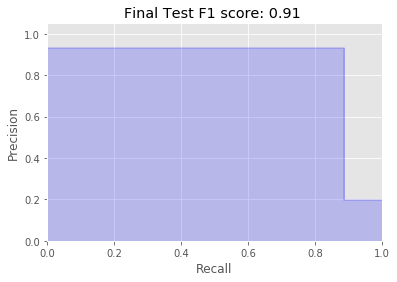

In [131]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_F,finalLinearSVC_test_prediction)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Final Test F1 score: %.2f '%f1_score(finalLinearSVC_test_prediction, y_test_F))

## Plotting AUC ROC curve

C:\Users\shmbh\Anaconda4\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


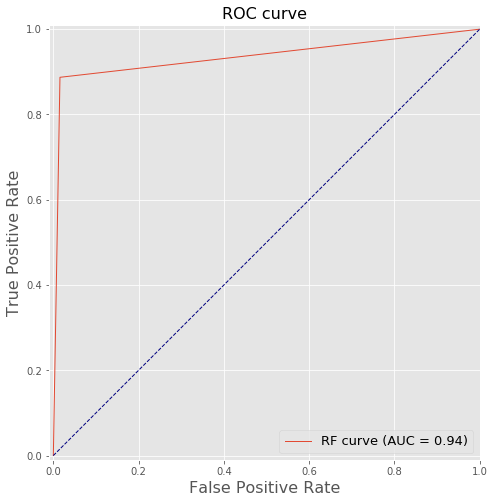

In [132]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_F, finalLinearSVC_test_prediction)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()